# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

**Импортируем библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 30) 
pd.set_option("display.float_format", "{:.2f}".format)
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(8)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN


**Выводим информацию о данных фрейма**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Проверяем наличие явных дубликатов в DateFrame
df.duplicated().sum()

0

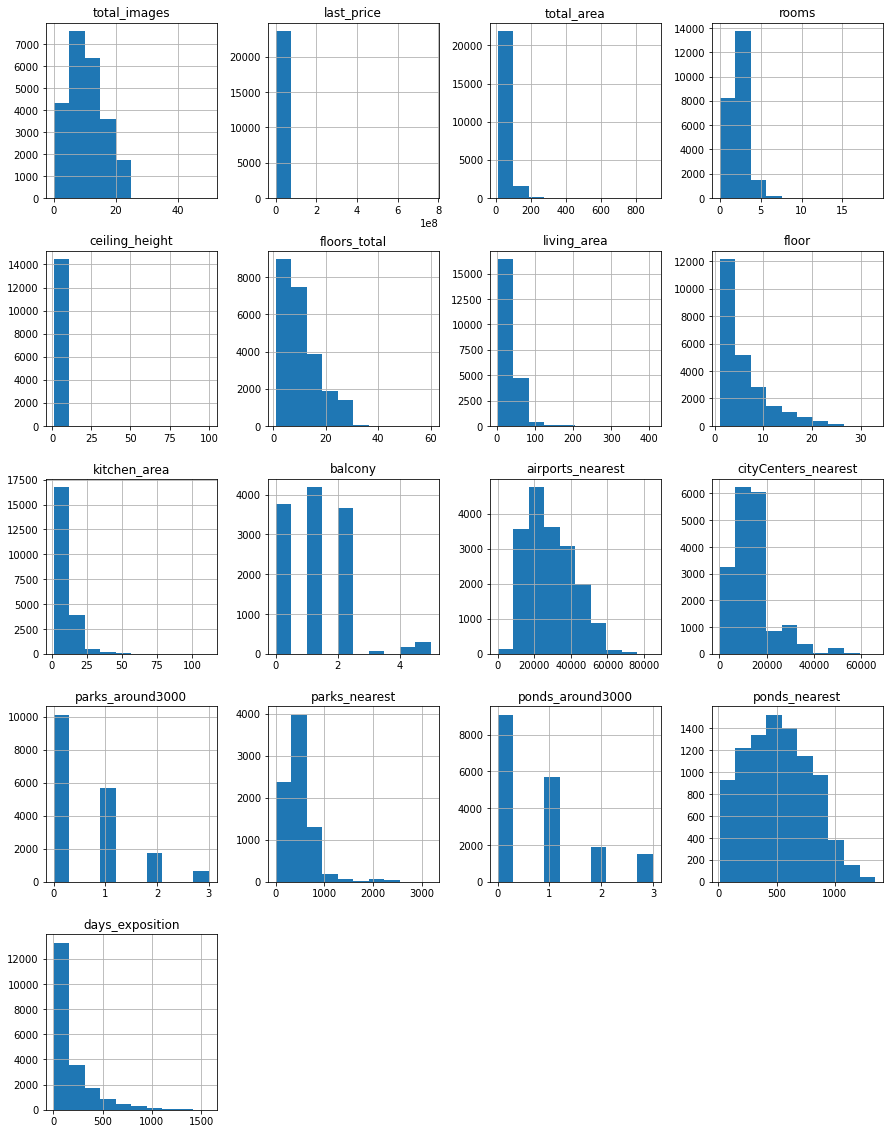

In [5]:
#Построим гистограмму для всех числовых столбцов таблицы
df.hist(figsize=(15,20));

**Вывод:**

В общей информации о данных 23699 записей. 
В столбцах есть пропуски и некорректные типы данных. 
Дубликаты отсутствуют. 
На нескольких гистограммах есть выбросы.

### Выполните предобработку данных

**Найдем пропуски в данных**

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заменим некорректные названия**

In [7]:
# переименуем столбец с Заглавной буквой
df = df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Изменим регистр в название столбца - для стиля написания 

In [8]:
# сменим тип данных в last_price c чисел с плавающей точкой на целочисленное
df['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

Математические операции с целыми числами выполняются быстрее чем с числами с плавающей точкой, да и значение цены обычно указывается для недвижимости кратно тысячи.

In [9]:
# преобразуем строки в даты, с округлением до дня размещения
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1d')
df['first_day_exposition'].sample(10)

14235   2018-01-12
21624   2018-08-02
3138    2016-10-09
13472   2018-07-10
16675   2015-08-23
17627   2017-11-08
17892   2018-04-01
3440    2018-10-17
11931   2018-02-15
17528   2016-05-23
Name: first_day_exposition, dtype: datetime64[ns]

В дате размещения объявления указано и время размещения. Для удобства оставляем только дату и заменим тип данных на временной.

In [10]:
# NaN в информации о высоте потолка заполним медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print(df['ceiling_height'].sample(10))
# переносом запятой исправляем явную ошибку в данных
df.loc[(df['ceiling_height'] >= 6.0), 'ceiling_height'] = df['ceiling_height'] / 10
print(df['ceiling_height'].describe())

9654    2.70
7072    3.00
5991    2.65
17518   2.65
6815    2.72
7995    2.65
16959   2.55
7720    2.65
20366   2.65
12022   2.50
Name: ceiling_height, dtype: float64
count   23699.00
mean        2.70
std         0.23
min         0.60
25%         2.60
50%         2.65
75%         2.70
max        10.00
Name: ceiling_height, dtype: float64


Указанная высота потолка выше 6м может быть ошибкой ручного ввода данных. Большинство квартир имеет высоту потолка от 2.6 и выше. Вернем запятую на место и добавим медианную высоту потолка вместо недостающей.

In [11]:
# исправим пропуски в значениях этажей
for i in [5, 9, 16, 24]:
    df.loc[(df['floors_total'].isna()) & (df['floor'] <= i), 'floors_total'] = i
df.floors_total.describe()

count   23699.00
mean       10.68
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

Примем среднюю этажность постройки зданий 5, 9, 14, 24. Исправим пропуск в данных на одно из этих чисел.

In [12]:
# заменяем пропуски в  жилой площади медианной жилой площади из общей площади для каждого значения диапазона количества комнат
for i in range(0, df['rooms'].max()):
    ratio = (df[df['rooms'] == i]['living_area'] / df[df['rooms'] == i]['total_area']).median()
    df['living_area'] = df['living_area'].fillna(value = df['total_area'] * ratio)
df['living_area'].describe()

count   23699.00
mean       35.20
std        23.03
min         2.00
25%        19.00
50%        30.40
75%        42.90
max       435.17
Name: living_area, dtype: float64

Пропуски в данных скорее всего ошибка ввода.

In [13]:
# изменим данные с NaN в is_apartament на False 
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['is_apartment'].astype(bool)
df['is_apartment'].describe()

count     23699
unique        2
top       False
freq      23649
Name: is_apartment, dtype: object

Аппартаменты - ответ либо да либо нет - не имеет числа комнат, поэтому булев тип. Пропуск может быть из-за операции ввода данных.

In [14]:
# найдем корреляцию данных к столбцу kitchen_area
df.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area']

kitchen_area            1.00
total_area              0.61
last_price              0.52
living_area             0.44
ceiling_height          0.33
rooms                   0.27
floors_total            0.16
ponds_around3000        0.15
floor                   0.14
total_images            0.10
days_exposition         0.10
balcony                 0.10
parks_around3000        0.09
is_apartment            0.05
parks_nearest           0.03
airports_nearest        0.01
ponds_nearest          -0.11
city_centers_nearest   -0.19
studio                   NaN
open_plan                NaN
Name: kitchen_area, dtype: float64

Явной зависимости от других данных непрослеживается, может быть не указали владельцы аппартаментов или квартир со свободной планировкой.

In [15]:
# заменим пропуски в kitchen_area  на 0
df['kitchen_area'] = df['kitchen_area'].fillna(0)

Пропуски в столбце - отсутствие кухни в студии

In [16]:
# найдем зависимость данных к столбцу balcony корреляцией Пирсона
df.corr().sort_values(by='balcony', ascending=False)['balcony']

balcony                 1.00
floors_total            0.19
floor                   0.17
total_images            0.12
kitchen_area            0.11
airports_nearest        0.07
parks_nearest           0.05
city_centers_nearest    0.05
total_area              0.05
is_apartment            0.04
studio                  0.03
last_price              0.03
open_plan               0.02
living_area             0.02
rooms                   0.02
ponds_nearest           0.01
ceiling_height         -0.02
ponds_around3000       -0.03
days_exposition        -0.03
parks_around3000       -0.08
Name: balcony, dtype: float64

Зависимости от данных не наблюдается. Причины отсутствия балконов примерно в 50% данных - их нет или просто не указали.

In [17]:
# заменим пропуски в balcony на 0
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype(int)

In [18]:
# производим замену на строчные буквы в locality_name
df['locality_name'] = df['locality_name'].str.lower()
# удаляем неудобные названия
df['locality_name'] = df['locality_name'].str.replace('ё','е').replace(['городской поселок ', 'городского типа ', 'деревня ',  'пансионат ', 'платформа ', 'поселок ', 'при железнодорожной станции ', 'садоводческое некоммерческое товарищество ',
    'садовое товарищество ', 'село ', 'станции '], '', regex=True)
# Уникальные значения в алфавитном порядке
set(df['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зеленый бор',
 'зимитицы',
 'ивангород',
 'изва

In [19]:
#заменим NaN на Unknow
df['locality_name'] = df['locality_name'].fillna('unknown')

In [20]:
df['locality_name']

0        санкт-петербург
1                 шушары
2        санкт-петербург
3        санкт-петербург
4        санкт-петербург
              ...       
23694    санкт-петербург
23695              тосно
23696        рождествено
23697    санкт-петербург
23698        новый учхоз
Name: locality_name, Length: 23699, dtype: object

Изменили данные в столбце имя объекта - убрали вид объекта, заменили пропуски.

In [21]:
df['airports_nearest']

0       18863.00
1       12817.00
2       21741.00
3       28098.00
4       31856.00
          ...   
23694   24665.00
23695        NaN
23696        NaN
23697   39140.00
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

пропуски в данных airports_nearest могу указывать на отсутствие аэропорта или не близком его расположении, не изменяем данные 

In [22]:
df['city_centers_nearest']
# оставим данные без корректировки

0       16028.00
1       18603.00
2       13933.00
3        6800.00
4        8098.00
          ...   
23694    4232.00
23695        NaN
23696        NaN
23697   10364.00
23698        NaN
Name: city_centers_nearest, Length: 23699, dtype: float64

незаполненые данные в столбце city_centers_nearest могут говорить о наличии объекта вне города (поселок, СНТ, и др.)

In [23]:
# изменим тип данных и заполним пропуски на 0 в столбце parks_around3000
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype(int)

незаполненые пропуски заменяем на 0, т.к. это говорит об отсутствии парков возле объекта продажи

In [24]:
# пропуски в parks_nearest
df['parks_nearest']

0       482.00
1          NaN
2        90.00
3        84.00
4       112.00
         ...  
23694   796.00
23695      NaN
23696      NaN
23697   173.00
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

оставим без изменения пропуски,  могут указывать на отсутствие парка возле объекта продажи

In [25]:
# изменим тип данных и заполним пропуски на 0 в столбце ponds_around3000
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype(int) 

 незаполненые пропуски заменяем на 0, т.к. это говорит об отсутствии водоема возле объекта продажи на указанном растоянии

In [26]:
# пропуски в ponds_nearest могут указывать что объект продается не возле водоема
df['ponds_nearest']

0       755.00
1          NaN
2       574.00
3       234.00
4        48.00
         ...  
23694   381.00
23695      NaN
23696      NaN
23697   196.00
23698      NaN
Name: ponds_nearest, Length: 23699, dtype: float64

In [27]:
# пропуски в days_exposition могут говорить о снятии с продажи объекта, данные оставим без изменения

**Вывод**
1. Произвели округление значений данных таблицы в нескольких столбцах.
2. Переименовали название столбца cityCenters_nearest на city_centers_nearest.
3. Изменили тип данных, в соответствии с данными находяшимися в столбцах:
    1. last_price    float64  int64    содержит только целые числа
	2. first_day_exposition	object	datetime64[ns]	cодержит время (удалили время размещения объявления)
	3. is_apartment	object	bool	cодержит булевы значения
	4. balcony	float64	int64	cодержит только целые числа
	5. parks_around3000	float64	int64	cодержит только целые числа
	6. ponds_around3000	float64	int64	cодержит только целые числа
4. Заменили пропущенные значения на медианные: балкона и жилой площади, высоты потолка (и переместили ошибочную запятую).
5. В других столбац произвели замены пропусков: 
    1. is_apartment
    2. kitchen_area
    3. locality_name
    4. airports_nearest
    5. parks_around3000
    6. ponds_around3000
6. Пропуски в автоматически собранных данных вероятно появиться вследствие некорректной информации от пользователя - некорректный адрес квартиры. Пропуски и ошибки в информации от пользователя - человеческий фактор(некорректный ввод данных или отсутствие технической возможности внести эти данные). Возможно, необходимо доработать форму подачи объявления.

### Добавьте в таблицу новые столбцы

**Внесем новые данные**

***Добавим столбец price_square_meter с ценой одного метра квадратного объекта с точностью до двух знаков после точки***

In [28]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

***Добавим столбец day_publication день недели публикации объявления (0-понедельник, 1-вторник и т.д.)***

In [29]:
# день недели публикации объявления
df['day_publication'] = df['first_day_exposition'].dt.weekday
df['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

***Добавим столбец month_publication месяц публикации объявления***

In [30]:
df['month_publication'] = df['first_day_exposition'].dt.month
df['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

***Добавим столбец year_publication год публикации объявления***

In [31]:
df['year_publication'] = df['first_day_exposition'].dt.year
df['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

***Добавим столбец type_floor_apartment тип этажа квартиры ("первый","последний","другой")***

In [32]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['type_floor_apartment'] = df.apply(floor, axis=1) 
df['type_floor_apartment'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

***Добавим столбец distance_city_centers расстояние до центра города в км***

In [33]:
df['distance_city_centers'] = (df['city_centers_nearest']/1000).round(0) 
df['distance_city_centers'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

In [34]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_floor_apartment,distance_city_centers
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1,482.00,2,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,шушары,12817.00,18603.00,0,NaN,0,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1,90.00,2,574.00,558.00,92785.71,3,8,2015,другой,14.00


### Проведите исследовательский анализ данных

***Построим гистограммы по отдельным параметрам и проведем их анализ*** 

****Общая площадь****

In [35]:
df['total_area'].describe()

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

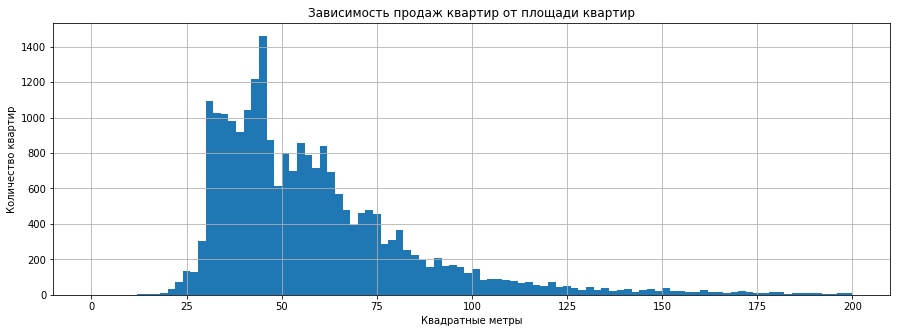

In [36]:
df.hist('total_area', bins=100, range=(0,200), figsize=(15,5))
plt.title('Зависимость продаж квартир от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Средняя площадь продаваемых квартир находится от 40 до 70 кв.м. По гистограмме видно что значительный объем (примерно 20%) в продаже занимает  площадь от 30 до 40 кв.м. Выбросы площади более 200 кв.м. скорее относится к элитному жилью (загородный дом).

****Жилая площадь****

In [37]:
df['living_area'].describe()

count   23699.00
mean       35.20
std        23.03
min         2.00
25%        19.00
50%        30.40
75%        42.90
max       435.17
Name: living_area, dtype: float64

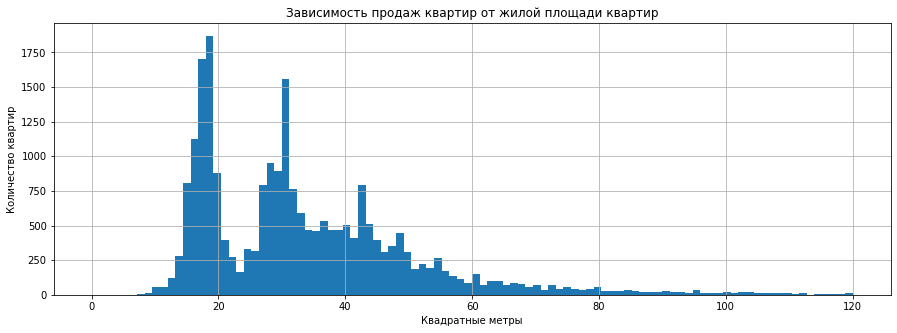

In [38]:
df.hist('living_area', bins=100, range=(0,120), figsize=(15,5))
plt.title('Зависимость продаж квартир от жилой площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

50% продаж приходится на квартиры площадью от 30 до 50 кв.м., 30% на квартиры площадьи от 14 до 22 кв.м.

****Площадь кухни****

In [39]:
df['kitchen_area'].describe()

count   23699.00
mean        9.55
std         6.42
min         0.00
25%         6.30
50%         9.00
75%        11.44
max       112.00
Name: kitchen_area, dtype: float64

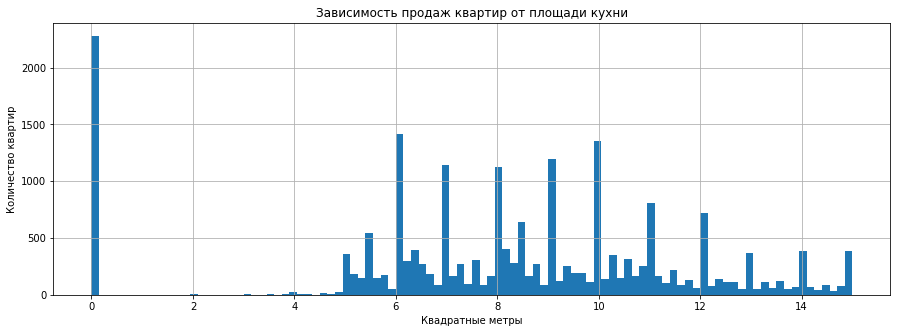

In [40]:
df.hist('kitchen_area', bins=100, range=(0,15), figsize=(15,5))
plt.title('Зависимость продаж квартир от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Размер кухни не влияет на продажу квартир, т.к. не видно на гистограмме явного выделения в какой-либо группе.
Большую часть продаж занимают квартиры со стандартной площадью 6-12 кв.м.
Группа продаж около 0 значения относится скорее к студии.

****Цена объекта****

In [41]:
# изменим размерность столбца last_price на значение - в млн.
df['last_price'] = df['last_price']/1000000
df['last_price'].describe()

count   23699.00
mean        6.54
std        10.89
min         0.01
25%         3.40
50%         4.65
75%         6.80
max       763.00
Name: last_price, dtype: float64

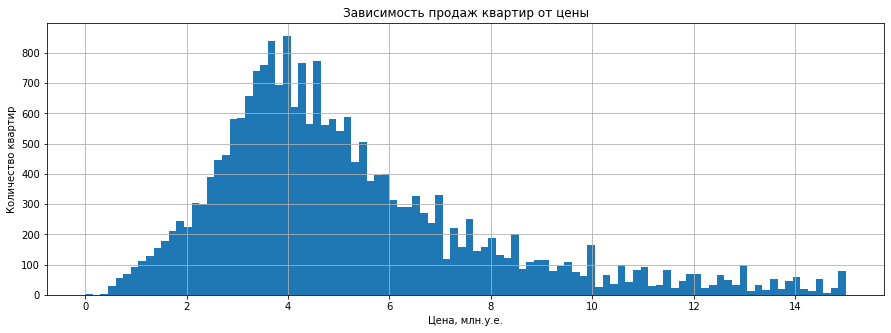

In [42]:
df.hist('last_price', bins=100, range=(0,15), figsize=(15,5))
plt.title('Зависимость продаж квартир от цены')
plt.xlabel('Цена, млн.у.е.')
plt.ylabel('Количество квартир')
plt.show()

Пик продаж приходится на квартиры ценой 3,5-4,5 млн. Дальше наблюдается спад в количестве продаваемых квартир. В дальнейшем рассчитаем корреляцию значения цены к другим предоставленным данным (площадь квартир и др.).

****Количество комнат****

In [43]:
df['rooms'].describe()

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

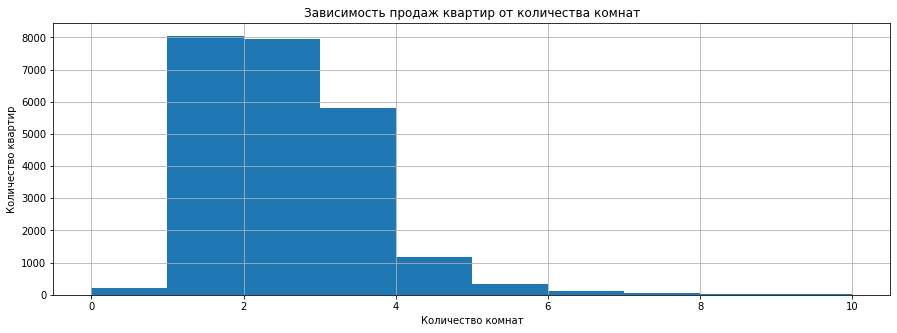

In [44]:
df.hist('rooms', bins=10, range=(0,10), figsize=(15,5))
plt.title('Зависимость продаж квартир от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме видно что в продаже больше всего 1, 2, 3 комнатных квартир. Увеличение количества комнат в продаваемых объектах в дальнейшем снижается линейно.

****Высота потолков****

In [45]:
df['ceiling_height'].describe()

count   23699.00
mean        2.70
std         0.23
min         0.60
25%         2.60
50%         2.65
75%         2.70
max        10.00
Name: ceiling_height, dtype: float64

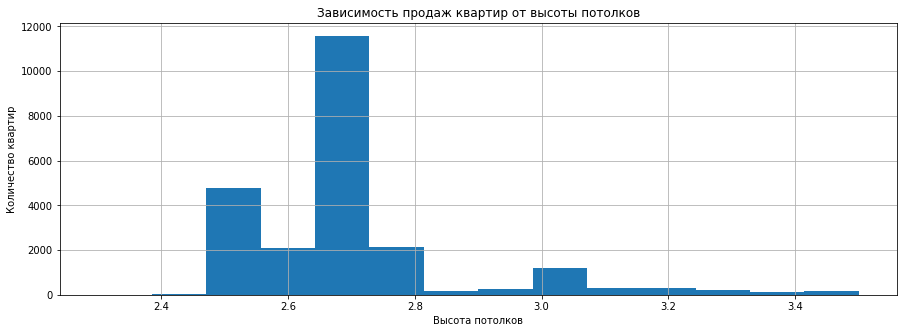

In [46]:
df.hist('ceiling_height', bins=14, range=(2.3, 3.5), figsize=(15,5))
plt.title('Зависимость продаж квартир от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

В продаже 80% квартир со стандартной высотой потолков 2.5 - 2.8м. 

****Тип этажа квартиры ("первый", "последний","другой")****

In [47]:
df['floor'].describe()

count   23699.00
mean        5.89
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

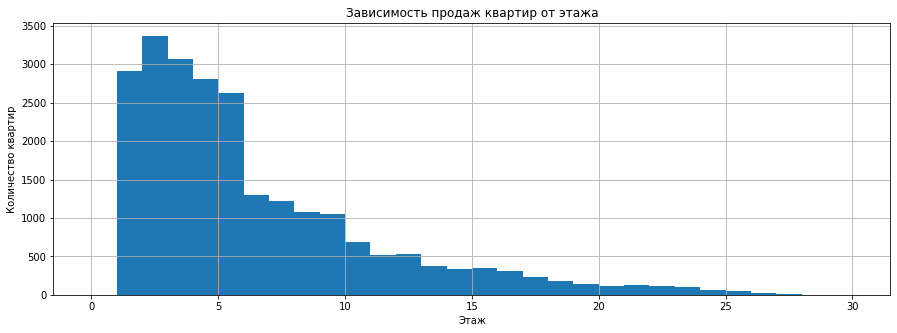

In [48]:
df.hist('floor', bins=30, range=(0, 30), figsize=(15,5))
plt.title('Зависимость продаж квартир от этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

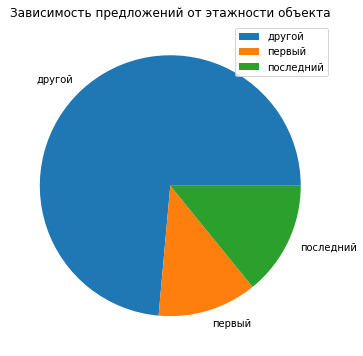

In [49]:
# Строим круговую диаграмму цены объекта от его этажности
df.pivot_table(index='type_floor_apartment',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(6,6), label='', title='Зависимость предложений от этажности объекта')
plt.show()

3/4 всех объявлений в продаже занимают квартиры между первым и последним этажом. 1/4 в продаже составляют первые и последнии этажи. Из гистограммы видно что большую часть продаж составляют этажи с 1 по 6, дальше идет спад.

****Общее количество этажей в доме****

In [50]:
df['floors_total'].describe()

count   23699.00
mean       10.68
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

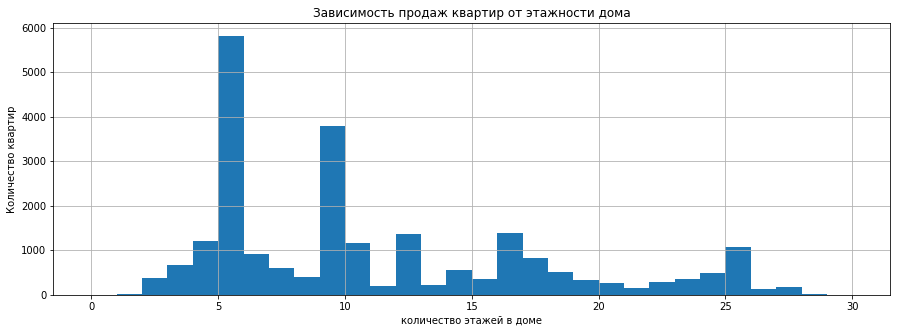

In [51]:
df.hist('floors_total', bins=30, range=(0, 30), figsize=(15,5))
plt.title('Зависимость продаж квартир от этажности дома')
plt.xlabel('количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

Больший объем объявлений о продаже приходится на дома с 5 этажами (около 6тыс.), потом в 9-ти этажных домах(около 4тыс.). Ничего не обычного - эти дома типовой застройки. 

****Расстояние до центра города в м****

In [52]:
df['city_centers_nearest'].describe()

count   18180.00
mean    14191.28
std      8608.39
min       181.00
25%      9238.00
50%     13098.50
75%     16293.00
max     65968.00
Name: city_centers_nearest, dtype: float64

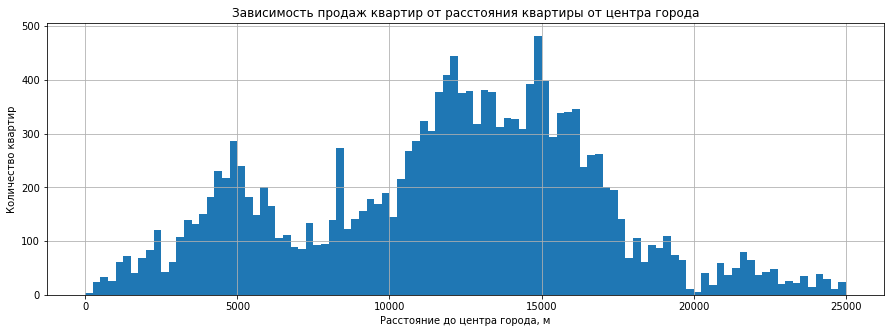

In [53]:
df.hist('city_centers_nearest', bins=100, range=(0,25000), figsize=(15,5))
plt.title('Зависимость продаж квартир от расстояния квартиры от центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество квартир')
plt.show()

Наблюдается увеличение продаж в районе 5км и 12-15км (возможно это спальный район или пригород)

****Расстояние до ближайшего парка****

In [54]:
df['parks_nearest'].describe()

count   8079.00
mean     490.80
std      342.32
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

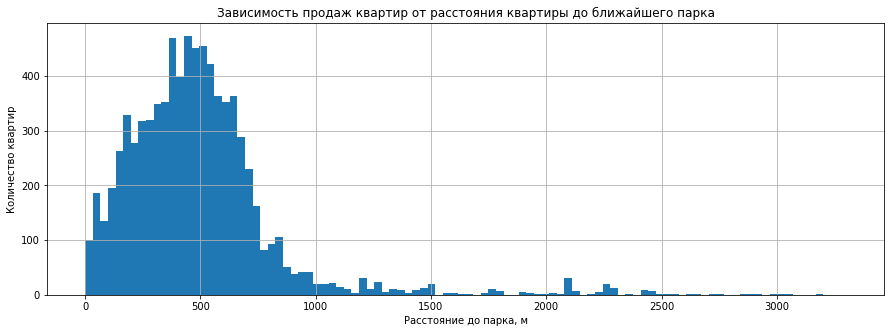

In [55]:
df.hist('parks_nearest', bins=100, range=(0,3300), figsize=(15,5))
plt.title('Зависимость продаж квартир от расстояния квартиры до ближайшего парка')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество квартир')
plt.show()

Среднее расстояние до парка от продаваемых объектов 300-600 м.

**Вывод по разделу - изучение параметров объекта продажи:**
1. Средняя площадь продаваемых квартир находится от 40 до 70 кв.м. По гистограмме видно что значительный объем (примерно 20%) в продаже занимает площадь от 30 до 40 кв.м. Выбросы площади более 200 кв.м. скорее относится к элитному жилью (загородный дом).
2. 50% продаж приходится на квартиры площадью от 30 до 50 кв.м., 30% на квартиры площадьи от 14 до 22 кв.м.
3. Размер кухни не влияет на продажу квартир, т.к. не видно на гистограмме явного выделения в какой-либо группе. Большую часть продаж занимают квартиры со стандартной площадью 6-12 кв.м. Группа продаж около 0 значения относится скорее к студии.
4. Пик продаж приходится на квартиры ценой 3,5-4,5 млн. Дальше наблюдается спад в количестве продаваемых квартир. 
5. По гистограмме видно что в продаже больше всего 1, 2, 3 комнатных квартир. Увеличение количества комнат в продаваемых объектах в дальнейшем снижается линейно.
6. В продаже 80% квартир со стандартной высотой потолков 2.6 - 2.8м.
7. 3/4 всех объявлений в продаже занимают квартиры между первым и последним этажом. 1/4 в продаже составляют первые и последнии этажи. Из гистограммы видно что большую часть продаж составляют этажи с 1 по 6, дальше идет спад.
8. Больший объем объявлений о продаже приходится на дома с 5 этажами (около 6тыс.), потом в 9-ти этажных домах(около 4тыс.). Ничего не обычного - эти дома типовой застройки.
9. Наблюдается увеличение продаж в районе 5км и 12-15км (возможно это спальный район или пригород)
10. От парка до продаваемых объектов 300-600 м.

Заключение: Среднестатистическое предложение - квартира в 5-9-ти этажном доме средней площадью до 52 кв. метра с кухней в 6 (8-10) кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная в предела 5-12км от центра города..

***Изучим как быстро продаются квартиры***

In [56]:
df['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

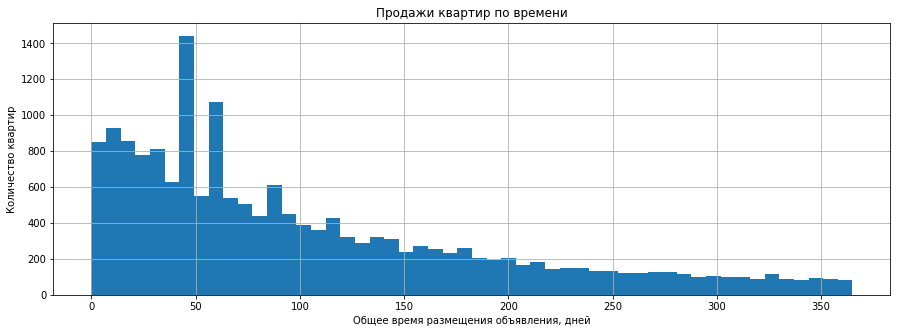

In [57]:
df.hist('days_exposition', bins=52, range=(0,365), figsize=(15,5))
plt.title('Продажи квартир по времени')
plt.xlabel('Общее время размещения объявления, дней')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**
Гистограмма показывает что быстрые продажи объекта - до 45 дней, средние продажи в районе 180 дней, долгие - свыше 230 дней.
Медианное значение в 95 дней указывает на более правильное среднее время продажи т.к. не зависит от выбросов

***Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.***

Произведем очистку столбцов kitchen_area, last_price, living_area, rooms, total_area, ceiling_height от первой и последней четверти выборки для исключения влияния выбросов.

In [58]:
# Оставим данные в диапазоне 25-75% межквартильного размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
new = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']
for col in new:
    df[col] = quartile_range(df, col)

In [59]:
print('Корреляция:')
print(df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr())

Корреляция:
              kitchen_area  last_price  living_area  rooms  total_area
kitchen_area          1.00        0.51        -0.14  -0.13        0.34
last_price            0.51        1.00         0.71   0.55        0.91
living_area          -0.14        0.71         1.00   0.90        0.91
rooms                -0.13        0.55         0.90   1.00        0.79
total_area            0.34        0.91         0.91   0.79        1.00


Чем выше корреляция тем зависимость параметров больше друг от друга. Измененые данные позволяют сказать что есть прямая зависимость стоимости объекта от общей площади, жилой площади. Меньше всего влияет на стоимость объекта размер кухни и количество комнат. 

Построим графики зависимости стоимости от параметров указанных выше.

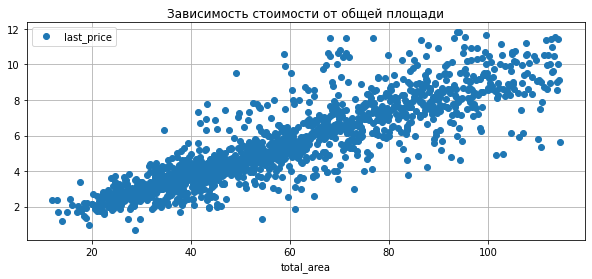

In [60]:
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 4))
plt.title('Зависимость стоимости от общей площади')
plt.show()

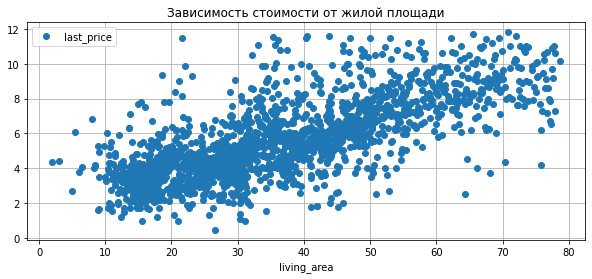

In [61]:
df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 4))
plt.title('Зависимость стоимости от жилой площади')
plt.show()

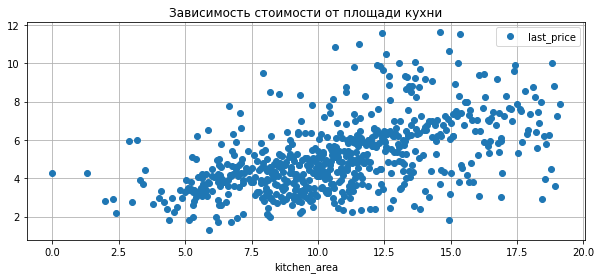

In [62]:
df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 4))
plt.title('Зависимость стоимости от площади кухни')
plt.show()

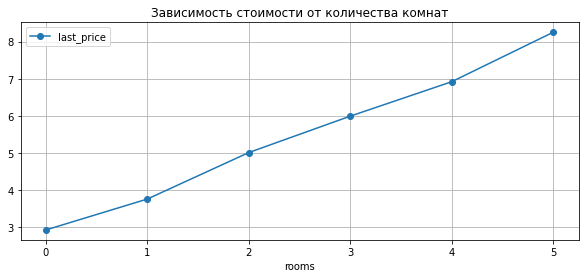

In [63]:
df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 4))
plt.title('Зависимость стоимости от количества комнат')
plt.show()

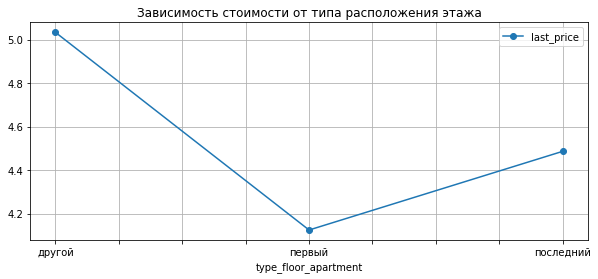

In [64]:
df.pivot_table(index='type_floor_apartment', values='last_price').plot(grid=True, style='o-', figsize=(10, 4))
plt.title('Зависимость стоимости от типа расположения этажа')
plt.show()

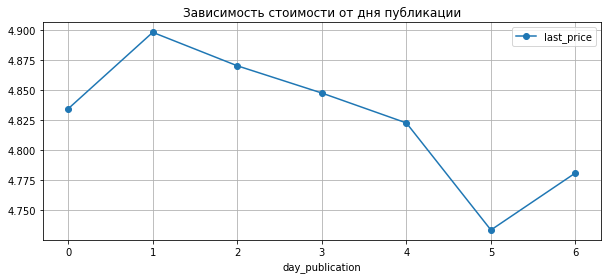

In [65]:
df.pivot_table(index='day_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 4))
plt.title('Зависимость стоимости от дня публикации')
plt.show()

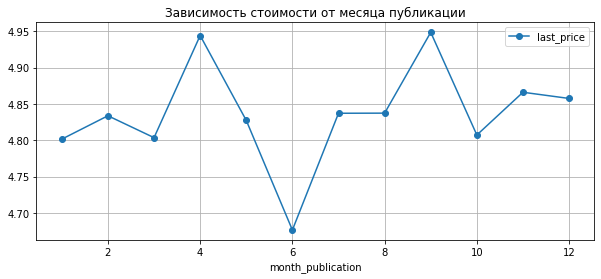

In [66]:
df.pivot_table(index='month_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 4))
plt.title('Зависимость стоимости от месяца публикации')
plt.show()

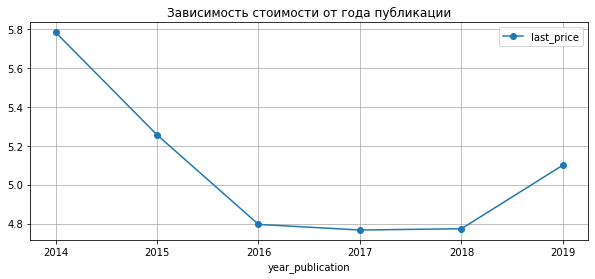

In [67]:
df.pivot_table(index='year_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 4))
plt.title('Зависимость стоимости от года публикации')
plt.show()

***Вывод***

Графики рассеивания подтвердили прямую зависимость стоимости объекта от общей и жилой площади. Чем больше площадь, тем выше стоимость.
Количество комнат прямо пропорционально влияет на стоимость (больше комнат выше цена, т.к. увеличивается жилая площадь), хотя корреляция и меньше чем от жилой площади. Возможно это из-за квартир свободной планировки.
Наблюдается небольшая тенденция к увеличению стоимости квартиры от площади кухни.  
В продаже значительно больше объектов расположенных средних этажах.
Зависимости стоимости от дня недели, когда квартира была выставлена на продажу, месяца и года практически нулевая. 

***Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений***

In [68]:
# создаем переменную с данными таблицы
average_price_sq_m_locality_name = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
average_price_sq_m_locality_name.columns = ['count']
# сортируем данные по количеству объявлений
average_price_sq_m_locality_name = average_price_sq_m_locality_name.sort_values(by='count', ascending=False)
average_price_sq_m_locality_name['price_square_meter'] = df.pivot_table(index='locality_name', values='price_square_meter').round(2)
print(average_price_sq_m_locality_name.head(10))

                 count  price_square_meter
locality_name                             
санкт-петербург  13737           114849.01
мурино             590            86087.51
кудрово            470            95324.93
шушары             440            78677.36
всеволожск         397            68654.47
пушкин             338           103125.82
колпино            336            75424.58
парголово          327            90175.91
гатчина            305            68746.15
выборг             236            58141.91


****Вывод****

В таблице выведены 10 городов с наибольшими количествами объявлений о продаже. Лидером по стоимости кв.м. является Санкт-Петербург, как и по количеству объявлений, что на прямую связано с количеством населения. Самым низким по стоимости кв.м. жилья из 10 первых по количеству объявлений является район Выборга (скорее всего из-за удаленности от Санкт-Петербурга).

**Средняя стоимость квартир в зависимости от удаления от центра Санкт-Петербурга**

In [69]:
spb_km_price = df.query('locality_name == "санкт-петербург"')
spb_km_price = spb_km_price.pivot_table(index='distance_city_centers', values='last_price', aggfunc=['mean'])
spb_km_price.columns = ['mean_price']
spb_km_price.head(32)

,mean_price
distance_city_centers,
0.00,8.40
1.00,8.15
2.00,7.97
3.00,7.35
4.00,7.61
5.00,7.66
6.00,7.11
7.00,6.64
8.00,6.62


Text(0.5, 1.0, 'Зависимость стоимости квартиры от расстояния до центра СПБ')

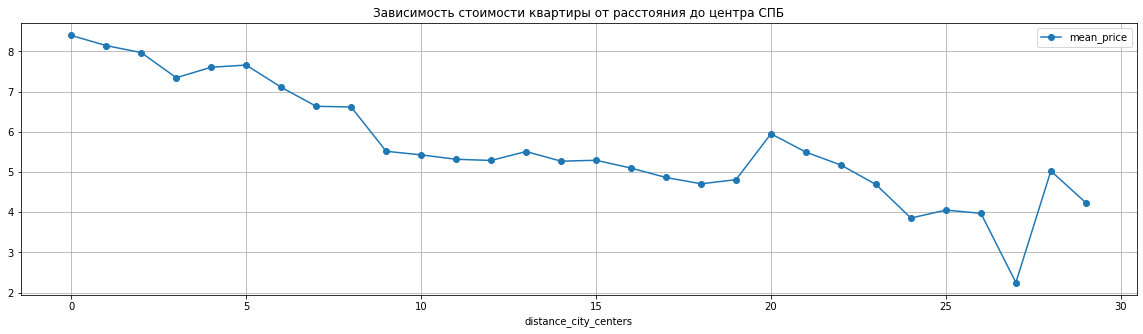

In [70]:
spb_km_price.pivot_table(index='distance_city_centers', values='mean_price').plot(grid=True, style='o-', figsize=(20, 5))
plt.title('Зависимость стоимости квартиры от расстояния до центра СПБ')

**Вывод**

В таблице выведена средняя стоимость объектов в СПБ в зависимости от удаления от центра. 
По графику можно сделать заключение, что на квартиры в центре в пределах до 2 км будет наибольшая стоимость. Дальше до 19 км идет почти линейное снижение цены объекта. Наблюдается всплеск на 20 и 28 км (возможно это новые районы застройки).  

### Напишите общий вывод

*ОБЩИЙ ВЫВОД*

1. Из общей информации о предоставленных данных можно сказать следующее:
 1. наличие пропущенных значений и не корректный тип данных
 2. отсутствие дубликатов
 3. в нескольких гистограммах есть незначительные выбросы данных

Вывод - произведем предобработку данных

2. Предобработкой данных изменили: столбец с заглавной буквой, заполнили пропуски в значениях, изменили типы данных, во временном столбце убрали значение внутридневного размещения объявления. В таблицу добавлены столбцы:  price_square_meter, day_publication, month_publication, year_publication, type_floor_apartment, distance_city_centers.

Вывод - пропуски в автоматически собранных данных вероятно появиться вследствие некорректной информации от пользователя (некорректный адрес квартиры). Пропуски и ошибки в информации от пользователя - возможно человеческий фактор (некорректный ввод данных или отсутствие технической возможности внести эти данные, либо неполная информация). Возможно, необходимо доработать форму подачи объявления.

3. Провели исследовательский анализ предоставленных данных
   1. С помощью гистограмм провели анализ зависимости по отдельным параметрам 
      1. Средняя площадь  квартир находится от 40 до 70 кв.м. 50% - квартиры площадью от 30 до 50кв.м., 30% -от  14 до 22 кв.м.
      2. Размер кухни не влияет на продажу квартир. Большую часть продаж занимают квартиры со стандартной площадью 6-12 кв.м.
      3. Пик продаж приходится на квартиры ценой 3,5-4,5 млн. 
      4. Больше всего 1, 2, 3 комнатных квартир. 
      4. В продаже 80% квартир со стандартной высотой потолков 2.6 - 2.8м.
      5. 3/4 всех объявлений в продаже занимают квартиры между первым и последним этажом в 5-9-ти этажных домах.
      6. Увеличение продаж в районе 5км и 12-15км (возможно это спальный район или пригород), и в 300-600 м от парка.
         
      Заключение: Среднестатистическое предложение - квартира в 5-9-ти этажном доме средней площадью до 52 кв. метра с кухней в 8 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная в предела 5-12км от центра города.
   
   2. Определили среднее время продажи квартиры в 180 дней. Быстрые продажи объекта - до 45 дней, долгие - свыше 230 дней. Среднее (медианное)время продажи в 3 месяца более реалистично, т.к. меньше подвержено влиянию сверхбыстрых и сверхдолгих продаж.
   
   3. Определили факторы, которые больше всего влияют на общую (полную) стоимость объекта. 
       Заключение: 
       1. Графики рассеивания подтвердили прямую зависимость стоимости объекта от общей и жилой площади. 
       2. Количество комнат прямо пропорционально влияет на стоимость (больше комнат выше цена, т.к. увеличивается жилая площадь), хотя корреляция и меньше чем от жилой площади. 
       3. Наблюдается небольшая тенденция к увеличению стоимости квартиры от площади кухни.
       4. В продаже значительно больше объектов расположенных не на первом и не на последнем этажах. 
       5. Зависимости стоимости от дня недели, когда квартира была выставлена на продажу, месяца и года практически нулевая.

   4. Рассчитали среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений
      Лидером по стоимости кв.м. является Санкт-Петербург, как и по количеству объявлений, что на прямую связано с количеством населения. Самым низким по стоимости кв.м. жилья из 10 первых по количеству объявлений является район Выборга (скорее всего из-за удаленности от Санкт-Петербурга).
   
   5. Вычислили среднюю стоимость квартиры  на удалении от центра.
      В центре квартира в пределах до 2 км будет иметь наибольшую стоимость (8-8.4млн). Чем дальше от центра тем цена уменьшается. Наблюдается всплеск на 20 и 28 км (возможно это новые районы застройки).
      
Итоговое заключение:

    Параметры влияющие на стоимость квартиры в порядке убывания:
    1. Общая, жилая площадь и количество комнат
    2. Расположение квартиры по отношению к центру города
    3. Этаж нахождения квартиры
  
    Остальные параметры не влияют на прямую зависимость от них стоимости жилья. 
    Для более полной картины зависимости стоимости квартиры можно добавить параметры относящиеся к самому зданию (паркинг, количество лифтов, расположение котельной...), а также к инфраструктуре объекта (наличие детского сада, поликлиники, остановки транспортных средств, магазинов, рынков и т.д.).   
      